In [ ]:
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse

In [ ]:
# X_df = pd.read_csv('/content/df_x.csv')
# Y_df = pd.read_csv('/content/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/Exchange/S/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/Exchange/S/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...
7583,2010-10-06,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_df

,ds,unique_id,y
0,1990-01-01,OT,-0.124081
1,1990-01-02,OT,-0.113588
2,1990-01-03,OT,-0.078960
3,1990-01-04,OT,-0.082108
4,1990-01-05,OT,-0.066368
...,...,...,...
7583,2010-10-06,OT,0.902640
7584,2010-10-07,OT,0.953585
7585,2010-10-08,OT,0.956124
7586,2010-10-09,OT,0.921979


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7492,:]
Y_test_df = Y_df.iloc[7492:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7492,2010-07-07,OT,1.313849,-0.5,-0.166667,-0.300000,0.012329
1,7493,2010-07-08,OT,1.265496,-0.5,0.000000,-0.266667,0.015068
2,7494,2010-07-09,OT,1.271299,-0.5,0.166667,-0.233333,0.017808
3,7495,2010-07-10,OT,1.300722,-0.5,0.333333,-0.200000,0.020548
4,7496,2010-07-11,OT,1.296545,-0.5,0.500000,-0.166667,0.023288
...,...,...,...,...,...,...,...,...
91,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
92,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
93,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
94,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2010-07-07,OT,1.313849,-0.5,-0.166667,-0.300000,0.012329
1,2010-07-08,OT,1.265496,-0.5,0.000000,-0.266667,0.015068
2,2010-07-09,OT,1.271299,-0.5,0.166667,-0.233333,0.017808
3,2010-07-10,OT,1.300722,-0.5,0.333333,-0.200000,0.020548
4,2010-07-11,OT,1.296545,-0.5,0.500000,-0.166667,0.023288
...,...,...,...,...,...,...,...
91,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
92,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
93,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
94,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 96
model = Informer(h=horizon, input_size=24,
               max_steps=20,
               )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,1.498242
OT,1,1.532832
OT,2,1.476646
OT,3,1.467729
OT,4,1.439921
...,...,...
OT,91,0.649389
OT,92,1.318936
OT,93,1.346937


<Axes: xlabel='ds'>

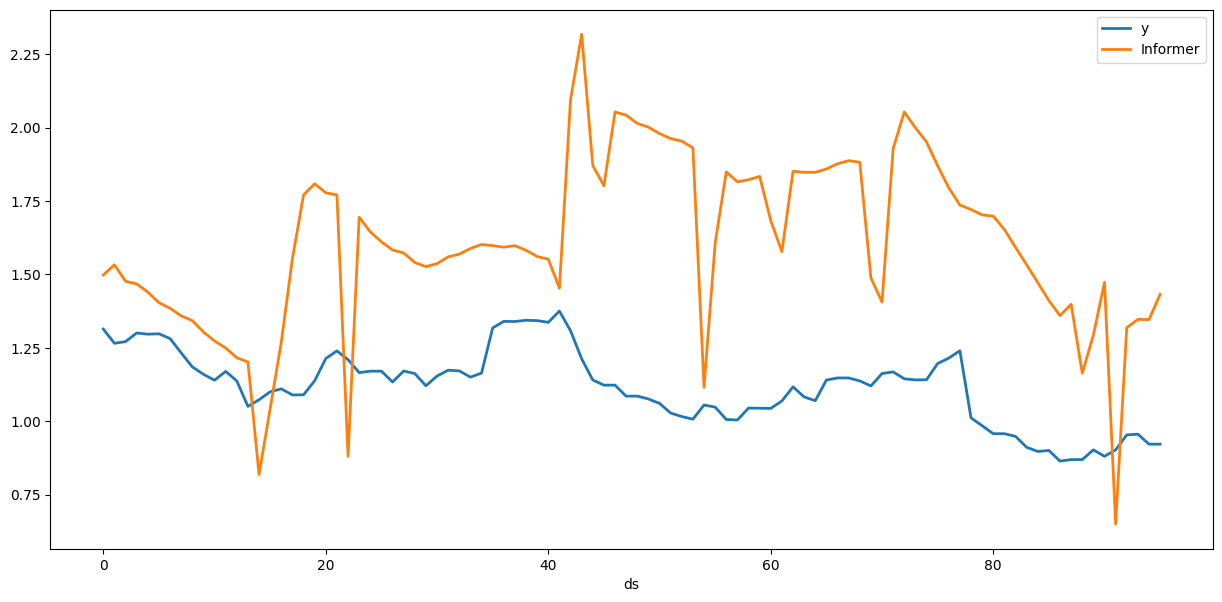

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,1.498242
1,1.532832
2,1.476646
3,1.467729
4,1.439921
...,...
91,0.649389
92,1.318936
93,1.346937


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.506
Informer MSE: 0.328


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7396,:]
Y_test_df = Y_df.iloc[7396:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7396,2010-04-02,OT,1.251718,-0.5,0.166667,-0.466667,-0.250685
1,7397,2010-04-03,OT,1.138444,-0.5,0.333333,-0.433333,-0.247945
2,7398,2010-04-04,OT,1.138444,-0.5,0.500000,-0.400000,-0.245205
3,7399,2010-04-05,OT,1.138444,-0.5,-0.500000,-0.366667,-0.242466
4,7400,2010-04-06,OT,0.992389,-0.5,-0.333333,-0.333333,-0.239726
...,...,...,...,...,...,...,...,...
187,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
188,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
189,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
190,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2010-04-02,OT,1.251718,-0.5,0.166667,-0.466667,-0.250685
1,2010-04-03,OT,1.138444,-0.5,0.333333,-0.433333,-0.247945
2,2010-04-04,OT,1.138444,-0.5,0.500000,-0.400000,-0.245205
3,2010-04-05,OT,1.138444,-0.5,-0.500000,-0.366667,-0.242466
4,2010-04-06,OT,0.992389,-0.5,-0.333333,-0.333333,-0.239726
...,...,...,...,...,...,...,...
187,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
188,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
189,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
190,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 192
model = Informer(h=horizon, input_size=24,
               max_steps=20,
               )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,1.626253
OT,1,1.662898
OT,2,1.635609
OT,3,1.613663
OT,4,1.595011
...,...,...
OT,187,1.347257
OT,188,1.345984
OT,189,1.357059


<Axes: xlabel='ds'>

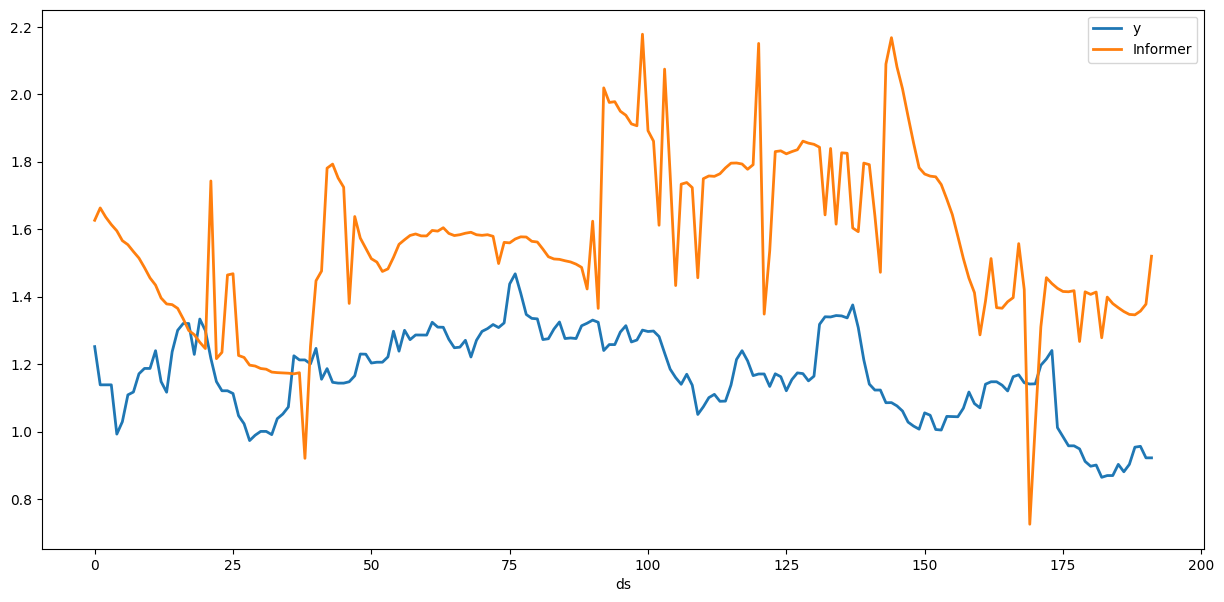

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,1.626253
1,1.662898
2,1.635609
3,1.613663
4,1.595011
...,...
187,1.347257
188,1.345984
189,1.357059


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.406
Informer MSE: 0.216


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7252,:]
Y_test_df = Y_df.iloc[7252:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7252,2009-11-09,OT,0.457496,-0.5,-0.500000,-0.233333,0.354795
1,7253,2009-11-10,OT,0.486961,-0.5,-0.333333,-0.200000,0.357534
2,7254,2009-11-11,OT,0.465229,-0.5,-0.166667,-0.166667,0.360274
3,7255,2009-11-12,OT,0.637980,-0.5,0.000000,-0.133333,0.363014
4,7256,2009-11-13,OT,0.716490,-0.5,0.166667,-0.100000,0.365753
...,...,...,...,...,...,...,...,...
331,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
332,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
333,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
334,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2009-11-09,OT,0.457496,-0.5,-0.500000,-0.233333,0.354795
1,2009-11-10,OT,0.486961,-0.5,-0.333333,-0.200000,0.357534
2,2009-11-11,OT,0.465229,-0.5,-0.166667,-0.166667,0.360274
3,2009-11-12,OT,0.637980,-0.5,0.000000,-0.133333,0.363014
4,2009-11-13,OT,0.716490,-0.5,0.166667,-0.100000,0.365753
...,...,...,...,...,...,...,...
331,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
332,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
333,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
334,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 336
model = Informer(h=horizon, input_size=24,
               max_steps=20,
               )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,1.253249
OT,1,1.261847
OT,2,1.245409
OT,3,1.208217
OT,4,1.193041
...,...,...
OT,331,1.277397
OT,332,1.288817
OT,333,1.298957


<Axes: xlabel='ds'>

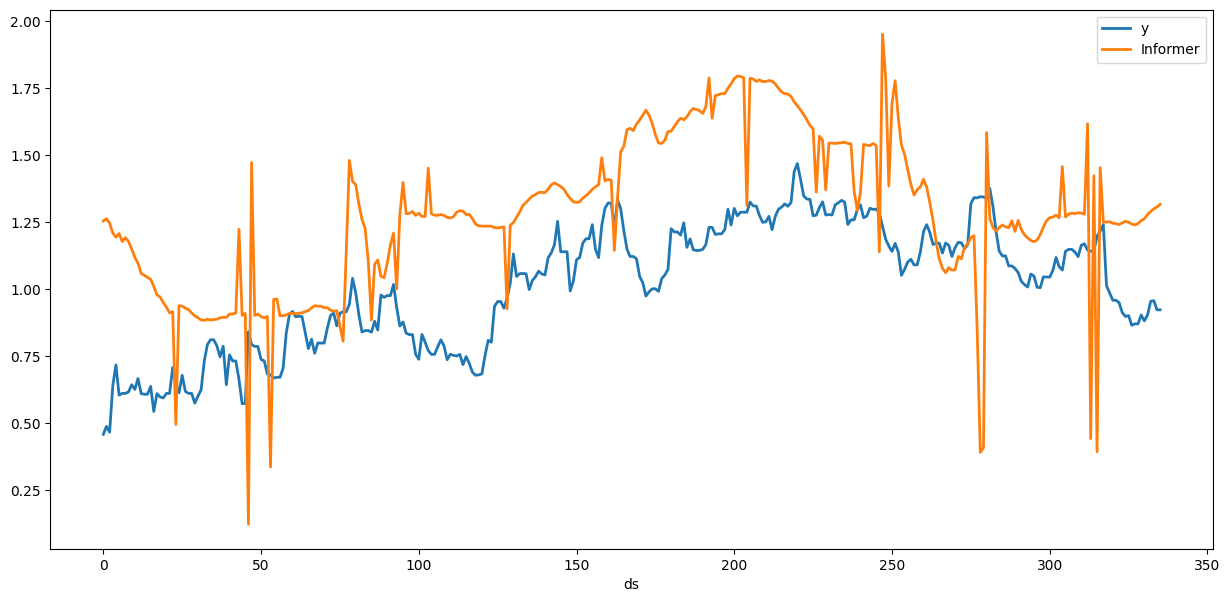

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,1.253249
1,1.261847
2,1.245409
3,1.208217
4,1.193041
...,...
331,1.277397
332,1.288817
333,1.298957


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.313
Informer MSE: 0.134


## Horizon 720

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:6868,:]
Y_test_df = Y_df.iloc[6868:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,6868,2008-10-21,OT,1.807954,-0.5,-0.333333,0.166667,0.305479
1,6869,2008-10-22,OT,1.768531,-0.5,-0.166667,0.200000,0.308219
2,6870,2008-10-23,OT,1.776391,-0.5,0.000000,0.233333,0.310959
3,6871,2008-10-24,OT,1.826685,-0.5,0.166667,0.266667,0.313699
4,6872,2008-10-25,OT,1.815562,-0.5,0.333333,0.300000,0.316438
...,...,...,...,...,...,...,...,...
715,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
716,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
717,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
718,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2008-10-21,OT,1.807954,-0.5,-0.333333,0.166667,0.305479
1,2008-10-22,OT,1.768531,-0.5,-0.166667,0.200000,0.308219
2,2008-10-23,OT,1.776391,-0.5,0.000000,0.233333,0.310959
3,2008-10-24,OT,1.826685,-0.5,0.166667,0.266667,0.313699
4,2008-10-25,OT,1.815562,-0.5,0.333333,0.300000,0.316438
...,...,...,...,...,...,...,...
715,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
716,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
717,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
718,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 720
model = Informer(h=horizon, input_size=24,
               max_steps=20,
               )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,2.277068
OT,1,2.326155
OT,2,2.314834
OT,3,2.297504
OT,4,2.279195
...,...,...
OT,715,1.543185
OT,716,1.542513
OT,717,1.540044


<Axes: xlabel='ds'>

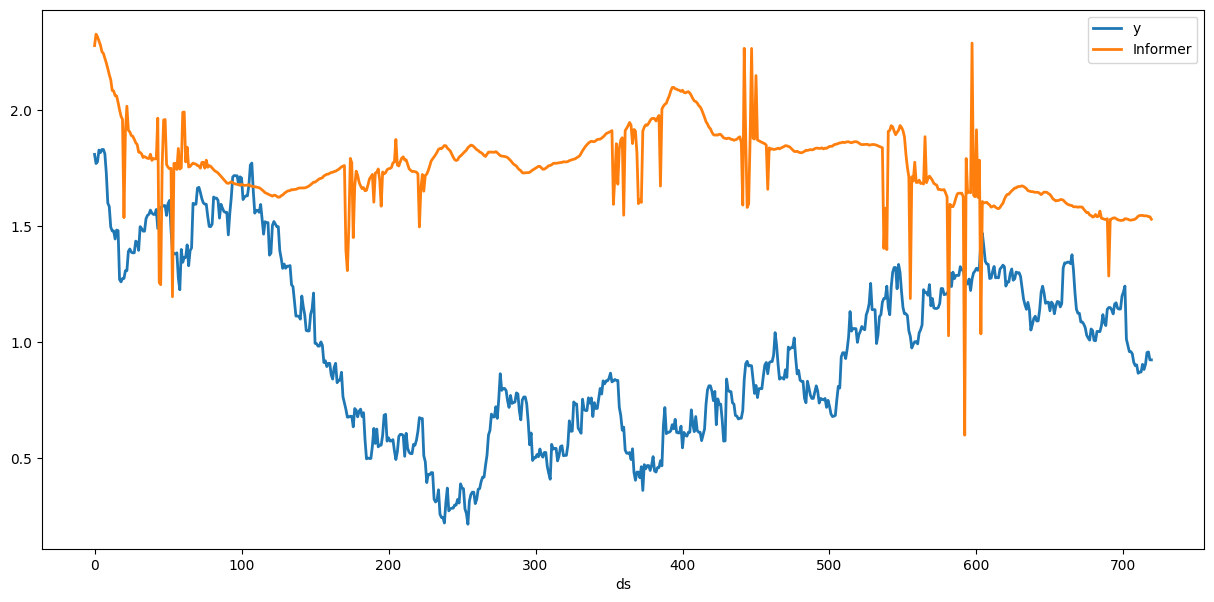

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,2.277068
1,2.326155
2,2.314834
3,2.297504
4,2.279195
...,...
715,1.543185
716,1.542513
717,1.540044


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.796
Informer MSE: 0.819
